# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


**Ход исслледования**

-  Обзор данных

- Предобработка данных

  - Определение и изучение пропущенных значений.
  - Привеение данных к нужным типам.
- Расчет и добавление новых данных в таблицу:

  - цену квадратного метра;
  - день недели, месяц и год публикации объявления;
  - этаж квартиры; варианты — первый, последний, другой;
  - соотношение жилой и общей площади, отношение площади кухни к общей.
- Исследовательский анализ данных

  - Изучение параметров: площадь, цена, число комнат, высота потолков.
  - Изучение времени продажи квартиры.
  - Выявление и удаление редких и выбивающихся значений.
  - Выявление факторов больше всего влияющих на стоимость квартиры.
  - Изучение 10 населённых пунктов с наибольшим числом объявлений.
  - Изучение, как цена квартир зависит от удалённости от центра.
  - Изучение сегмента квартир в центре.
- Результаты

  - Выводы
  - Рекомендации

## Импортируем библиотеки и изучим датасет

In [538]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use = ('dark_backgrtound')

df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')


In [539]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [541]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


In [542]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [543]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [544]:
df.duplicated().sum()

0

**Выводы**


Видим проблемы с типом данных по некоторым столбцам, достаточно большое количество пропусков.
Явных дубликтов нет. По столбцам 'last_price' ,'total_area', 'rooms', 'ceiling_height', 'living_area', 'kitchen_area' присутствуют аномальные значения, на первый взгляд.

## Предобработка данных

### Приведем названия столбцов к нижнему регистру

In [545]:
df.columns = df.columns.str.lower()
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Разберемся с неявными дублями в названиях населенных пунктов

In [546]:
len(df['locality_name'].unique())

365

- Меняем букву 'ё' на 'е';
- Все значения с 'поселок' меняем на 'поселок';
- Все значения с 'товарищество' меняем на 'товарищество';
- Проверяем на сколько мы уменьшили количество неявны дублей;
- Оставляем только названиях населенных пунктов и проводим проверку

In [547]:
df['locality_name'] = df['locality_name'].str.replace('ё','е')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа','поселок')
df['locality_name'] = df['locality_name'].str.replace('городской поселок','поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок при железнодорожной станции','поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок станции','поселок')
df['locality_name'] = df['locality_name'].str.replace('коттеджный поселок','поселок')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество','товарищество')
df['locality_name'] = df['locality_name'].str.replace('садовое товарищество','товарищество')
print(len(df['locality_name'].unique()))
df['locality_name'] = df['locality_name'].str.replace('садовое товарищество ','')
df['locality_name'] = df['locality_name'].str.replace('деревня ','')
df['locality_name'] = df['locality_name'].str.replace('поселок ','')
df['locality_name'] = df['locality_name'].str.replace('село ','')
print(len(df['locality_name'].unique()))



319
308


Решая вопрос неявных дублей, из исходных 364 уникальных названия населенных пунктов, осталось 307

### Изучим пропущенные значения 

In [548]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [549]:
df.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
citycenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Отсутствие данных в таких параметрах как :
 - число парков в радиусе 3 км;
 - расстояние до ближайшего парка;
 - число водоёмов в радиусе 3 км;
 - расстояние до ближайшего водоёма;
 - число балконов;
 - расстояние до ближайшего аэропорта
 скорее всего обусловлено тем, что у объявлений о продаже этих параметров нет.
 
 Отсутствие данных в принадлежности недвижимости к апартаментам, возможно, обусловленно тем, что недвижимости таковой не является.
 
 Для данных параметров заменим пропуски на 0 и изменим тип данных. 

In [550]:
a = ['balcony','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest','floors_total']

for i in a:
    df[i] = df[i].fillna(0)
    df[i] = df[i].astype('int')

df['is_apartment'] = df['is_apartment'].fillna(0)
df['is_apartment'] = df['is_apartment'].astype('bool')

df['last_price'] = df['last_price'].astype('int')

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

Удалим из датасета данные, в которых отсутствуют названия населенных пунктов и данные об общем количестве этажей

In [551]:
df = df.query('locality_name.notna() and floors_total.notna()')

Предположим, что у студий в `kitchen_area`  отсутствуют данные. Если это так, заменим пропуски на 0.

In [552]:
print(len(df[df['studio']]))
print(len(df.query('studio == True and kitchen_area.isna()')))

149
149


Количество студий равно количеству пропусков по столбцу 'kitchen_area', следовательно заменим пропуски на 0

In [553]:
df['kitchen_area']=df['kitchen_area'].where(~df['studio'],0)

#### Проведём небольшой анализ и устраним пропуски в характеристиках квартир: высоте потолков, жилой площадью, площадью кухни, расстояним до центра города 

Создадим копию нашего датасета, она пригодится нам чуть позже

In [554]:
df_2 = df.copy(deep=True) 

In [555]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

##### Высота потолков

В данных присутствуют аномальные значения, котоыре могли появится в ходе невнимательности продавца при заполнении. Исправим часть из них:

In [556]:
df.loc[df['ceiling_height'] > 10, 'ceiling_height'] /= 10

Я слышал, что в Питере высота потолков зависит от дальности недвижимости от центра. Проверим это, построив диаграмму рассеивания и используем функцию corr():

<AxesSubplot:xlabel='citycenters_nearest', ylabel='ceiling_height'>

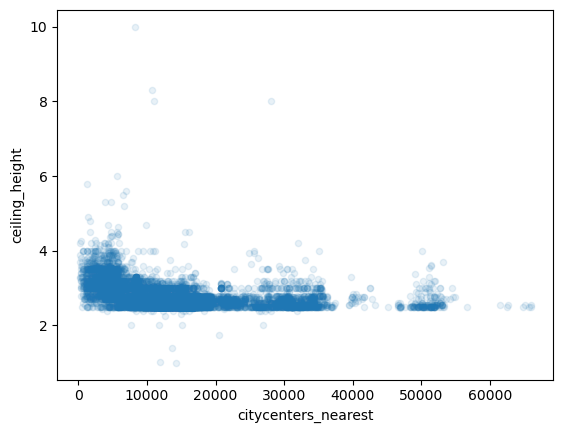

In [557]:
df.plot(kind='scatter', y='ceiling_height', x='citycenters_nearest', alpha=0.1 )

In [558]:
df['ceiling_height'].corr(df['citycenters_nearest'])

-0.34110558565796517

В результате проверки видим, что такая зависимость имеет место быть. Поэтому заменим пропуски в столбце 'ceiling_height' в зависимость от удаленность недвижимости:

In [559]:
df['ceiling_height'] = (df['ceiling_height']
                        .fillna(df.groupby('citycenters_nearest')['ceiling_height']
                                .transform('median')))

Посмотрим на результат

In [560]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          4734
floors_total               0
living_area             1898
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2120
balcony                    0
locality_name              0
airports_nearest        5534
citycenters_nearest     5511
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3180
dtype: int64

Видим, что не все пропуски были исправлены. Скорее всего это связано с пропусками в столбце `citycenters_nearest` оставшиеся пропуски заменим медианным значением по каждому населенному пункту

In [561]:
df['ceiling_height'] = (df['ceiling_height']
                        .fillna(df.groupby('locality_name')['ceiling_height']
                                .transform('median')))

In [562]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height            96
floors_total               0
living_area             1898
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2120
balcony                    0
locality_name              0
airports_nearest        5534
citycenters_nearest     5511
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3180
dtype: int64

Пропуски все равно остались, правда мало. Вот сейчас пригодится копия датасета для следующей проверки: Возможно пропуски остались, потому что у некоторых насленных пунктов или значений удаленности вообще не было никаких данных по высоте потолков. Чтобы это проверить создадим два списка, в одном из которых будут уникальные значения населенных пунктов для оставшихся пропусков, а в другом будут уникальные значения по удаленности. Создадим два запроса к копии датасета, в которых будем искать отсутствие пропусков в высоте потолков по значениям населенных пунктов, в другом по значению удаленности. Если результаты запроса будут пустыми, то заменим пропуски медианным значением по всему датасету, если не пустыми - то будем искать ошибку в прошлых преобразованиях

In [563]:
a = df[df['ceiling_height'].isna()]['locality_name'].unique()
a = list(a)

b = df[df['ceiling_height'].isna()]['citycenters_nearest'].unique()
b = list(a)

print(df_2.query('locality_name in @a and ceiling_height.notna()'))
print(df_2.query('citycenters_nearest in @b in @a and ceiling_height.notna()'))

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, citycenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, citycenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


Результаты запроса оказались пустыми, заменим пропуски на медианное значение 

In [564]:
a = df['ceiling_height'].describe()

df['ceiling_height'] = df['ceiling_height'].fillna(a['50%'])

df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1898
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2120
balcony                    0
locality_name              0
airports_nearest        5534
citycenters_nearest     5511
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3180
dtype: int64

##### Жилая площадь и кухни

Так как пропусков значениях общей площади нет, расчитаем жилую площадь как разницу общей площади и кухни, а площадь кухни как разницу общей площади и жилой площади

In [565]:
for i in range(len(df)):
    df.loc[(df['living_area'].isna()) & (df['kitchen_area'].notna()), 'living_area'] = \
     df['total_area'] - df['kitchen_area']

In [566]:
for i in range(len(df)):
    df.loc[(df['living_area'].notna()) & (df['kitchen_area'].isna()), 'kitchen_area'] = \
    df['total_area'] - df['living_area']

In [567]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1450
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            1450
balcony                    0
locality_name              0
airports_nearest        5534
citycenters_nearest     5511
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3180
dtype: int64

Оставшиеся пропуски заменима меианным значением по группировке

In [568]:
df['living_area'] = (df['living_area']
                     .fillna(df.groupby(['locality_name','rooms','total_area'])['living_area']
                             .transform('median')))
df['kitchen_area'] = (df['kitchen_area']
                      .fillna(df.groupby(['locality_name','rooms','total_area'])['kitchen_area']
                              .transform('median')))

In [569]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area              466
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             466
balcony                    0
locality_name              0
airports_nearest        5534
citycenters_nearest     5511
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3180
dtype: int64

В результате расчетов могли появится случаи, когда площадь кухни больше жилой. Оставим в датасетет только те варианты, где жилая площадь больше кухни


In [570]:
df = df.query('living_area > kitchen_area')

##### Расстояние до центра 

Заменим пропуски медианным значениям по населенному пункту

In [571]:
df['citycenters_nearest'] = (df['citycenters_nearest']
                             .fillna(df.groupby('locality_name')['citycenters_nearest']
                                     .transform('median')))

df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5120
citycenters_nearest     5033
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3060
dtype: int64

**Вывод: В самомо начале предобработки были исключены записи, где были пропуски в параметрах `locality_name` и `floors_total`, так как заменить пропуски на какие-либо правдоподобные значения возможности не было. В параметрах: `balcony`,`parks_around3000`,`parks_nearest`,`ponds_around3000`,`ponds_nearest` пропуски заменялись на 0, придерживаясь логики, что если продавец не указал количество балконов и других параметров, то , скорее всего, они отсутствуют.Пропуски в высотах потолков заполнялись сначала в зависимости от удаленности от центра, далее от населленного пункта, оставшиеся пропуски заполнилил медианным значением. Пропуски в площадных характеристиках высчитывались арифметически, в зависимости от наличия значений в параметрах `living_area` или `kitchen_area`. Максимально исключены неявные дубли в названиях населенных пунктов.**  

### Посчитаем и добавим в таблицу новые столбцы

#### Цена 1 кв.м.

In [572]:
df['price_1_kvm'] = df['last_price'] / df['total_area']

#### День,Месяц, Год

In [573]:
df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

#### Тип этажа

In [574]:
df.dropna(subset=['floors_total'])

def floor(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
    
df['type_floor'] = df.apply(floor, axis=1)


#### Расстояние в км

In [575]:
df['KM'] = (df['citycenters_nearest'] / 1000).round()



In [576]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1_kvm,day,month,year,type_floor,KM
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482,2,755,NaN,120370.370370,3,3,2019,Другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,0,0,81.0,82920.792079,1,12,2018,Первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,...,90,2,574,558.0,92785.714286,3,8,2015,Другой,14.0
3,0,64900000,159.00,2015-07-24,3,3.00,14,54.00,9,False,...,84,3,234,424.0,408176.100629,4,7,2015,Другой,7.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0,0,0,55.0,95065.789474,0,9,2018,Другой,NaN
7,5,7915000,71.60,2019-04-18,2,2.70,24,52.70,22,False,...,0,0,0,NaN,110544.692737,3,4,2019,Другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,0,0,0,189.0,87454.764777,2,5,2018,Другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,0,0,289.0,88524.590164,6,2,2017,Другой,15.0
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,310,2,553,137.0,127525.252525,3,11,2017,Другой,14.0
11,9,3300000,44.00,2018-08-27,2,2.50,5,31.00,4,False,...,0,0,0,7.0,75000.000000,0,8,2018,Другой,52.0


### Проведем исследовательский анализ данных

Создадим список из параметрв, по которому будут строиться гистрограммы

In [577]:
item = ['total_area','living_area','kitchen_area','last_price','rooms','ceiling_height',\
        'floor','type_floor','floors_total','citycenters_nearest','airports_nearest','parks_nearest']

count    22655.000000
mean        60.201038
std         35.079998
min         12.000000
25%         40.000000
50%         52.000000
75%         69.705000
max        900.000000
Name: total_area, dtype: float64

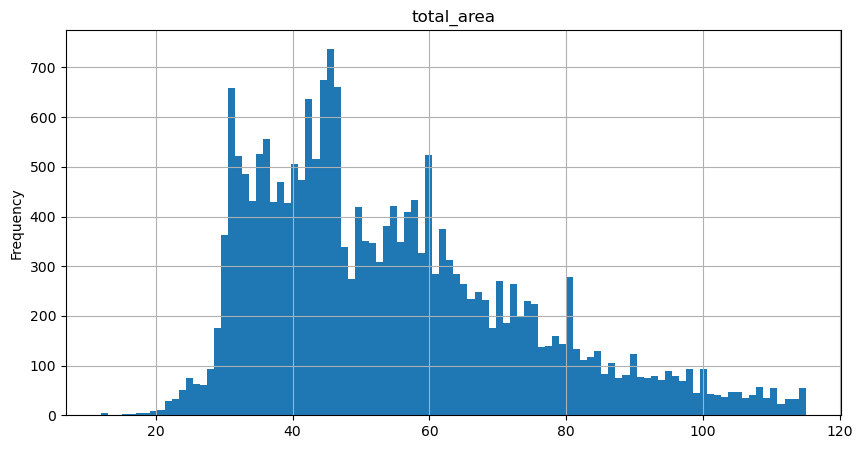

In [578]:
display(df[item[0]].describe())
plt.figure(figsize=(10,5))
df[item[0]].plot(kind='hist',bins=100, range=(12,115),  title=item[0],grid=True )
plt.show()

  

На рынке больше всего квартир с общей площадью площадью 45-47 кв.метров

count    22655.000000
mean        35.157802
std         23.054724
min          2.000000
25%         19.000000
50%         30.300000
75%         43.000000
max        571.000000
Name: living_area, dtype: float64

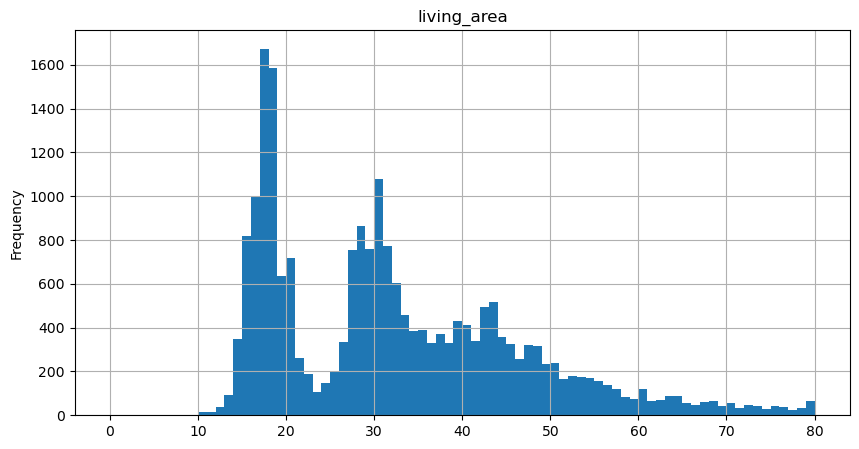

In [579]:
display(df[item[1]].describe())
plt.figure(figsize=(10,5))
df[item[1]].plot(kind='hist',bins=80, range=(0,80),  title=item[1],grid=True )
plt.show()

Квартиры с жилой площадью 17-18 кв.метров чаще встречаются на рынке

count    22655.000000
mean        10.413374
std          5.991189
min          0.000000
25%          7.000000
50%          9.000000
75%         11.900000
max        150.000000
Name: kitchen_area, dtype: float64

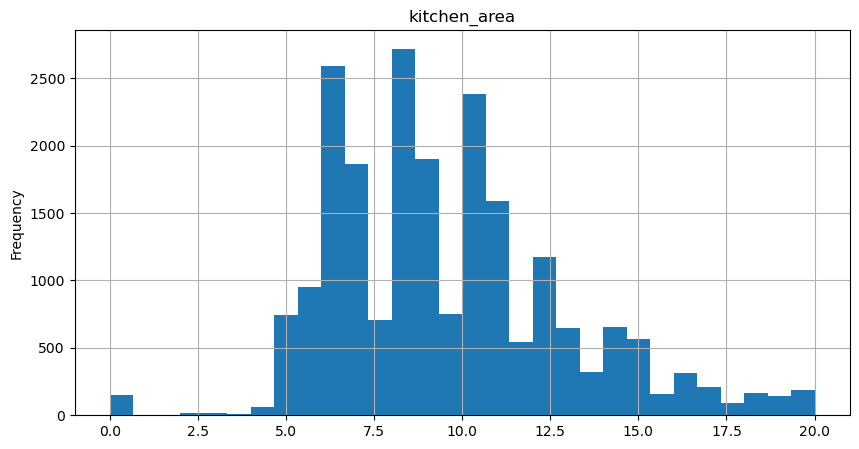

In [580]:
display(df[item[2]].describe())
plt.figure(figsize=(10,5))
df[item[2]].plot(kind='hist',bins=30, range=(0,20),  title=item[2],grid=True )
plt.show()

На рынке больше квартир с площадью кухни в 6,8,10 кв.метров

count     22655.000000
mean       6487.369349
std       10766.207811
min         430.000000
25%        3450.000000
50%        4650.000000
75%        6750.000000
max      763000.000000
Name: last_price, dtype: float64

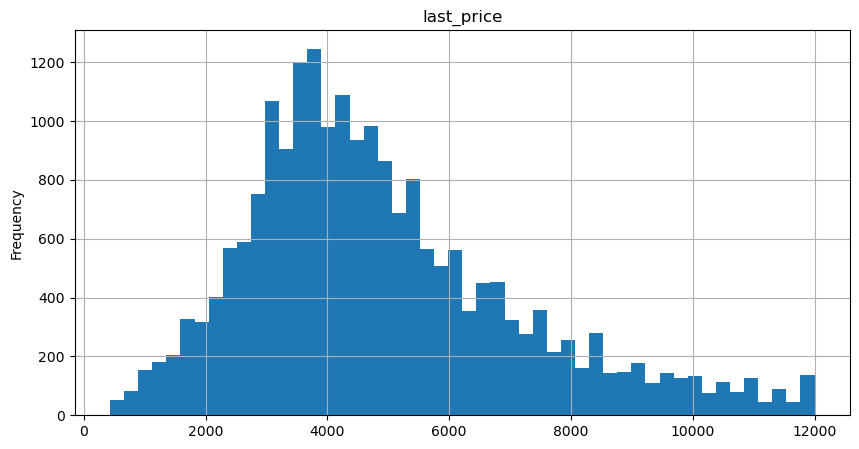

In [581]:
display((df[item[3]]/1000).describe())
plt.figure(figsize=(10,5))
(df[item[3]]/1000).plot(kind='hist',bins=50, range=(430,12000),  title=item[3],grid=True )
plt.show()

Чаще квартиры продают за 3.8 и 3.9 миллионов

count    22655.000000
mean         2.080247
std          1.077719
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

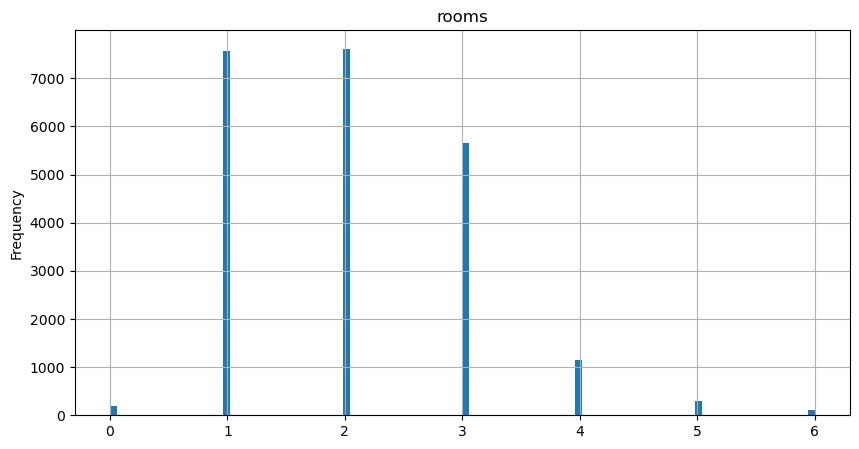

In [582]:
display(df[item[4]].describe())
plt.figure(figsize=(10,5))
df[item[4]].plot(kind='hist',bins=100, range=(0,6),  title=item[4],grid=True )
plt.show()

Чаще встречаются квартиры с 2 комнаты, реже с 1 и 3

count    22655.000000
mean         2.710266
std          0.261337
min          1.000000
25%          2.550000
50%          2.690000
75%          2.750000
max         10.000000
Name: ceiling_height, dtype: float64

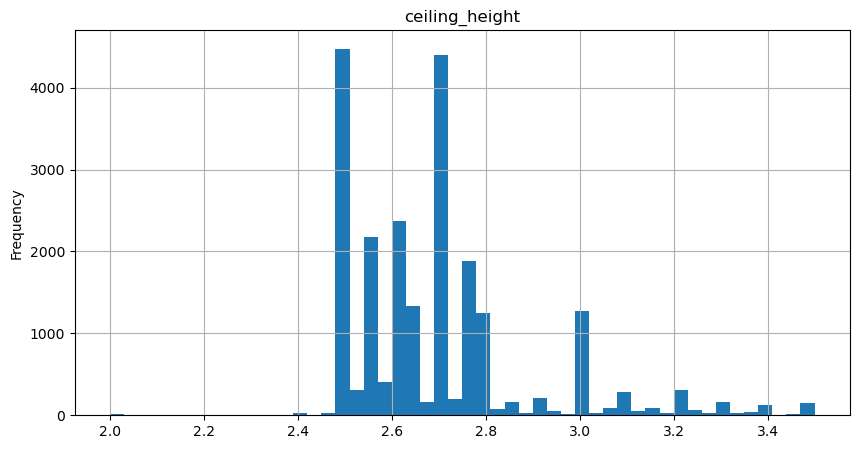

In [583]:
display(df[item[5]].describe())
plt.figure(figsize=(10,5))
df[item[5]].plot(kind='hist',bins=50, range=(2,3.5),  title=item[5],grid=True )
plt.show()

Квартиры с высотой потолков в 2.5 и в 2.7 метров больше на рынке

count    22655.000000
mean         5.883558
std          4.860520
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

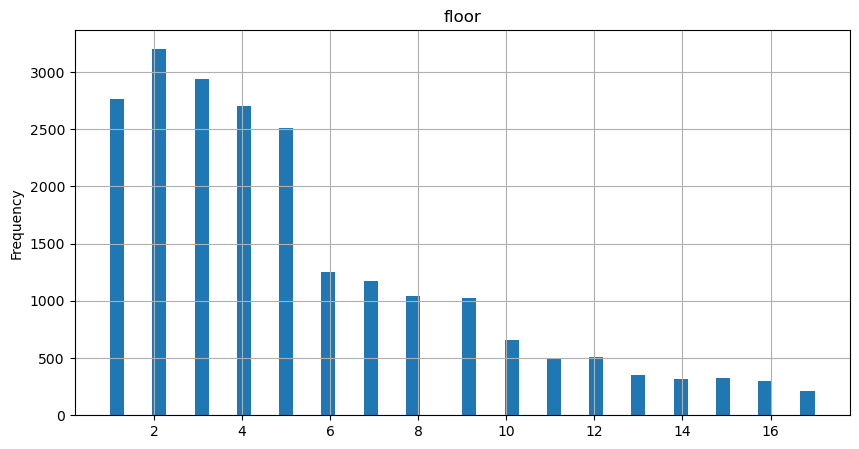

In [584]:
display(df[item[6]].describe())
plt.figure(figsize=(10,5))
df[item[6]].plot(kind='hist',bins=50 , range=(1,17), title=item[6],grid=True )
plt.show()

По графику видно, что больше объявлений с квартирами на втором этаже, а с увеличением этажности количество объявлений уменьшается

<AxesSubplot:>

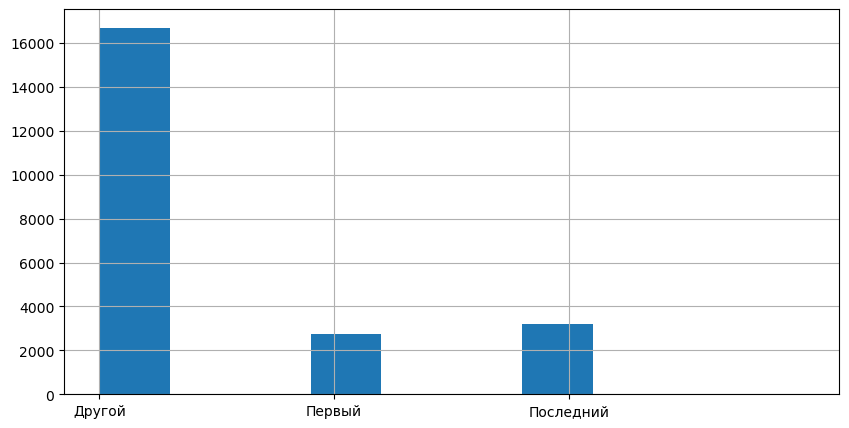

In [585]:
df['type_floor'].hist(grid=True, range=(0,3) ,figsize=(10,5))

Больше объявлений на любом этаже, кроме первого и последнего

count    22655.000000
mean        10.636637
std          6.586082
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

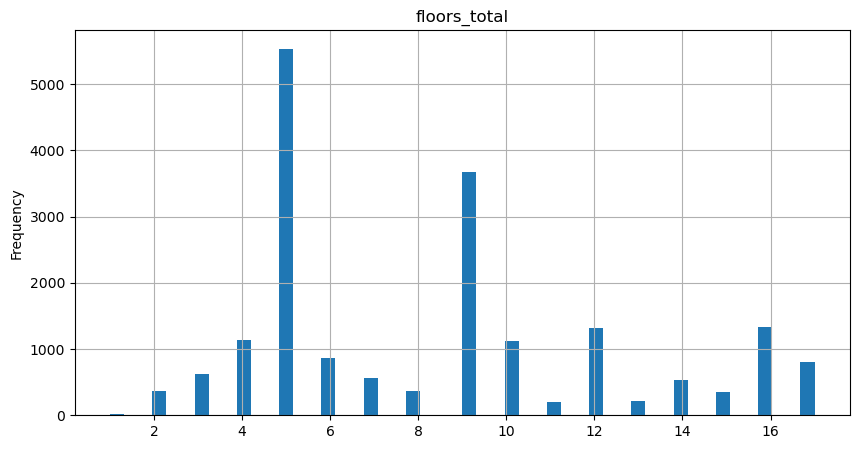

In [586]:
display(df[item[8]].describe())
plt.figure(figsize=(10,5))
df[item[8]].plot(kind='hist',bins=50 , range=(1,17), title=item[8],grid=True )
plt.show()

В 5 и 9 этажных домах чаще продают квартиры, чем в других домах

count    17622.000000
mean     14187.712802
std       8569.467415
min        181.000000
25%       9380.000000
50%      13086.500000
75%      16248.750000
max      65968.000000
Name: citycenters_nearest, dtype: float64

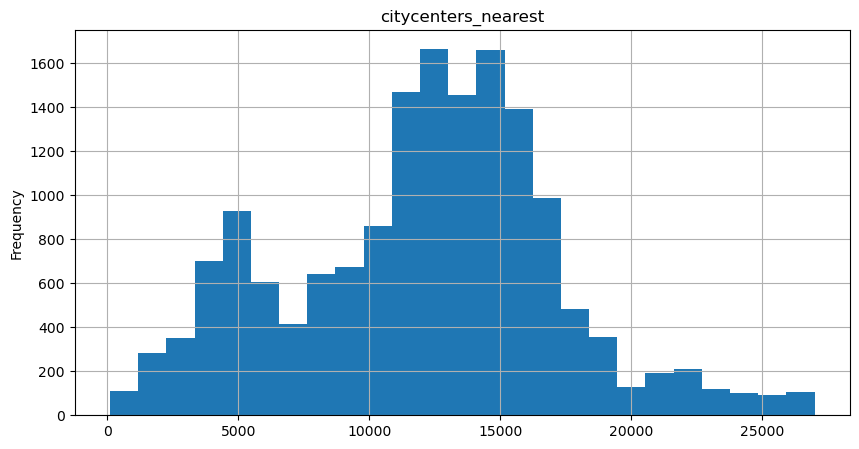

In [587]:
display(df[item[9]].describe())
plt.figure(figsize=(10,5))
df[item[9]].plot(kind='hist',bins=25 , range=(100,27000), title=item[9],grid=True )
plt.show()

На удаленности 10 - 17 км квартиры продают чаше, чем на других.Чаще всего на удаленности 14км

count    17535.000000
mean     28734.475506
std      12614.489305
min          0.000000
25%      18499.000000
50%      26711.000000
75%      37259.000000
max      84869.000000
Name: airports_nearest, dtype: float64

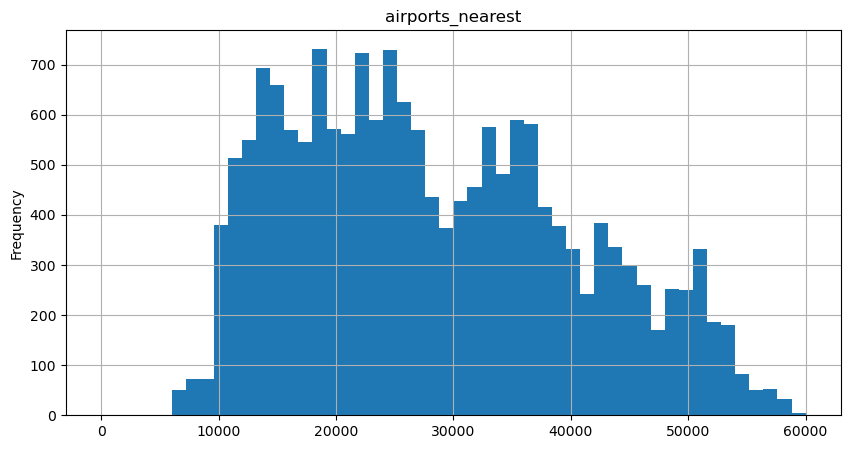

In [588]:
display(df[item[10]].describe())
plt.figure(figsize=(10,5))
df[item[10]].plot(kind='hist',bins=50 , range=(0,60000), title=item[10],grid=True )
plt.show()

Чаще всего аэропорты расположены в 14-15 км от квартир

count    22655.000000
mean       168.415626
std        306.138258
min          0.000000
25%          0.000000
50%          0.000000
75%        305.000000
max       3190.000000
Name: parks_nearest, dtype: float64

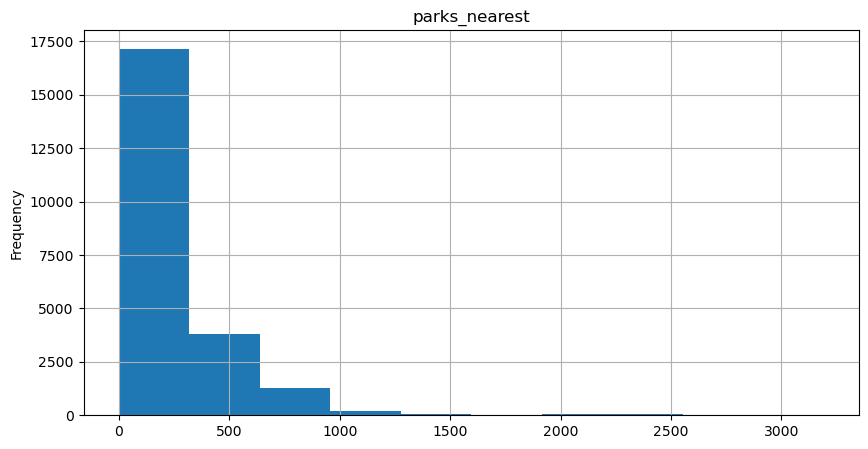

In [589]:
display(df[item[11]].describe())
plt.figure(figsize=(10,5))
df[item[11]].plot(kind='hist' , title=item[11],grid=True )
plt.show()

В среднем ближаший парк не дальше 250метров от квартиры

count    22655.000000
mean         2.564379
std          1.786126
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day, dtype: float64

<AxesSubplot:>

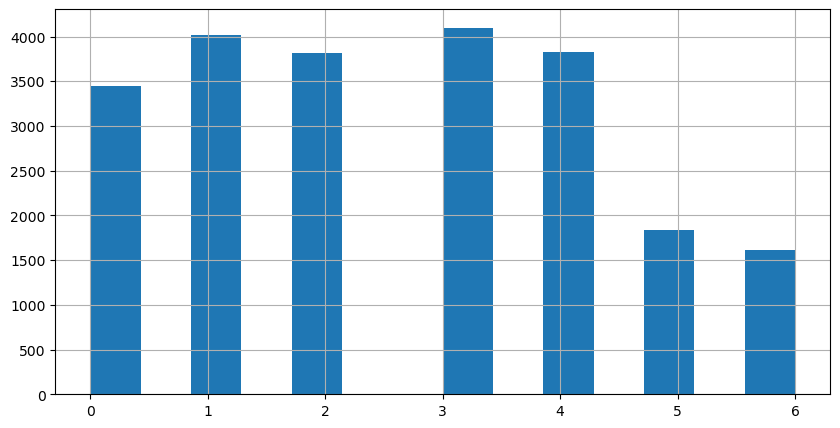

In [590]:
display(df['day'].describe())

df['day'].hist(bins=14, grid=True, figsize=(10,5))

В будни объявления размещают чаще, чем в выходные

count    22655.000000
mean         6.406709
std          3.479845
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

<AxesSubplot:>

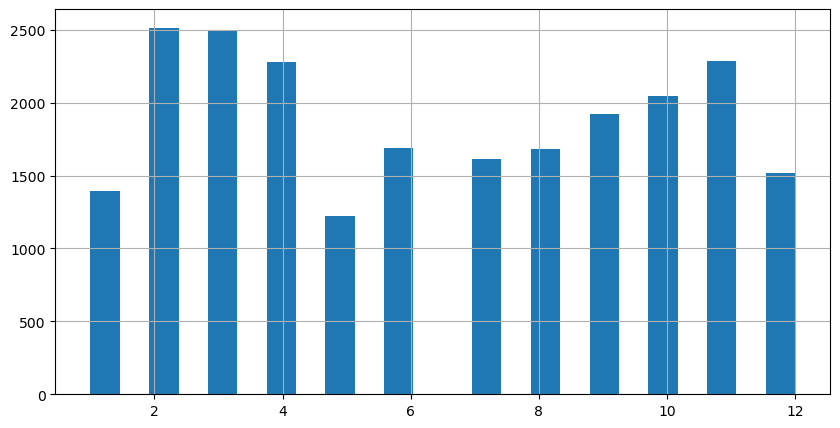

In [591]:
display(df['month'].describe())

df['month'].hist(bins=24, grid=True, figsize=(10,5))

Судя по графику, в феврале размещают больше всего объявлений и до апреля количество объявлений ни сильно уменьшается. В мае же количество объявлений о продажах самое низкое. С июня до ноября постепенно растет. В деабре и феврале количество объявление немного выше, чем в мае.

#### Days_exposition

<AxesSubplot:>

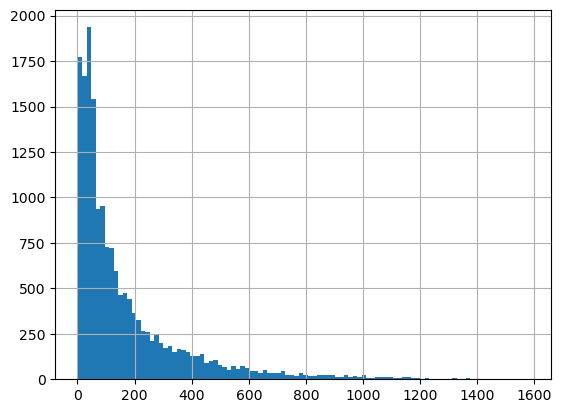

In [611]:
df['days_exposition'].hist(bins = 100)

count    19595.000000
mean       181.812197
std        220.365286
min          1.000000
25%         44.500000
50%         97.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

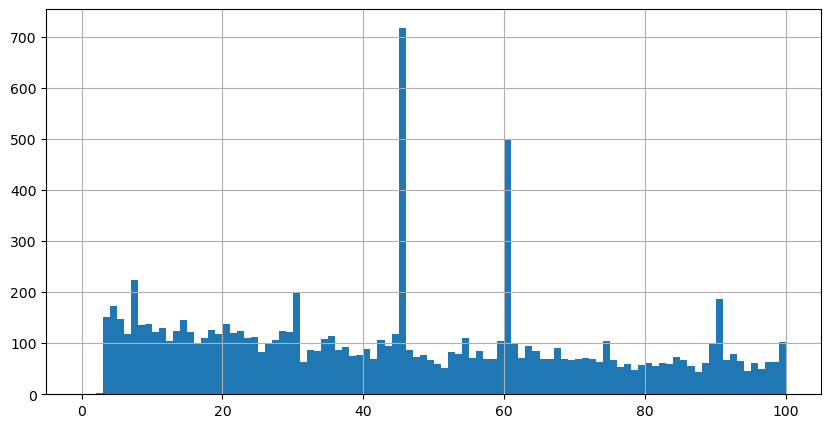

In [592]:
display(df['days_exposition'].describe())
df['days_exposition'].hist(bins = 100, range = (0, 100), figsize=(10,5))


В среднем квартиры продавались 181 дней.По медианному значению 97 день.Скорее всего среднее больше медины по причине того, что имеется недвижимость, которая продается по несколько лет.Имеются большие значения на 46 и 61, скорее всего являются аномалиями.\

Нормальным периодом продажи можно считать промежуток от 44 до 233 дней.

#### Влияние на стоимость квартиры

Для проведения анализа надо исключить влияние выбросов. Вспомнив "ящик с усами", мы знаем что в размах "усов" попадают нормальные значения, остальные же можно считать выбросами. Длиной "уса" является межквартильынй размах, умноженный на 1.5. Межквартильный размах это разница между третьим квартитем и первым. Напишем функцию, которая на вход получает датасет и столбец, в котором надо избавится от выбросов. От выбросов будем избавляться, оставляя в нем лишь те значения, которые попадают в "ящик с усами".

In [593]:
def norm(df,col):
    a = df[col].describe()
    mn = a['25%'] - 1.5*(a['75%'] - a['25%'])
    mx = a['75%'] + 1.5*(a['75%'] - a['25%'])
    return df.loc[(df[col] >= mn) &(df[col] <=mx)]

Создадим список, в который поместим названия столбцов, в которых надо избавиться от выбросов

In [594]:
a = ['last_price','total_area','living_area','kitchen_area']

for i in a:
    df = norm(df,i)

##### Построим графики, в которых посмотрим на влияние определенных параметров на цену квартиры

###### Влияние общей площади, жилой площади и площади кухни

<AxesSubplot:xlabel='last_price'>

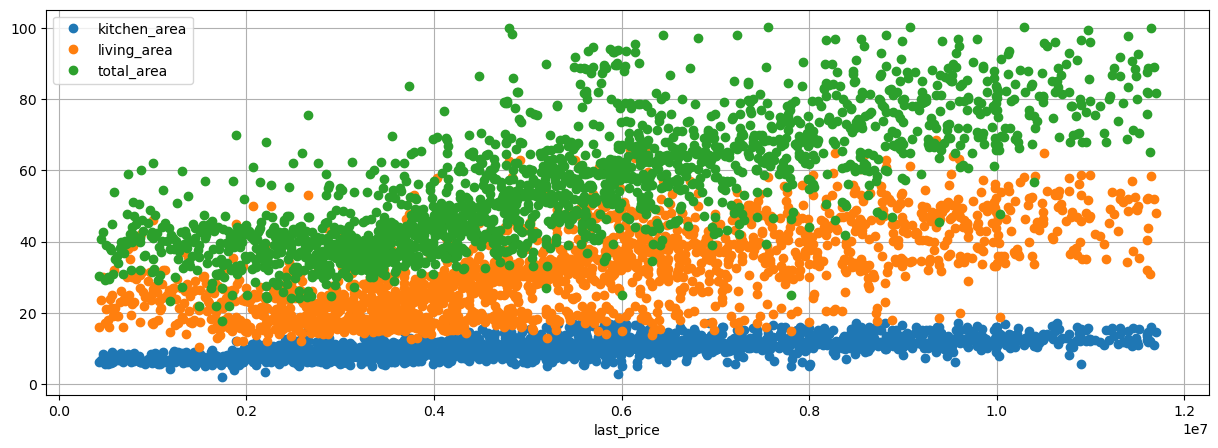

In [595]:
(df.pivot_table(index='last_price', values=['total_area','living_area','kitchen_area'])
 .plot(style='o',grid=True,figsize=(15,5)))

Посмотрим на значения корреляции

In [596]:
display(df['last_price'].corr(df['total_area']))
display(df['last_price'].corr(df['living_area']))
display(df['last_price'].corr(df['kitchen_area']))

0.672232723041441

0.5452855061547323

0.46391537165087443

Можно сказать, что площадь кухни и жилой площади оказывают умеренное влияние на стоимость квартиры. Общая площадь оказывает сильное влияние

###### Влияние количества комнат на цену

<AxesSubplot:xlabel='rooms'>

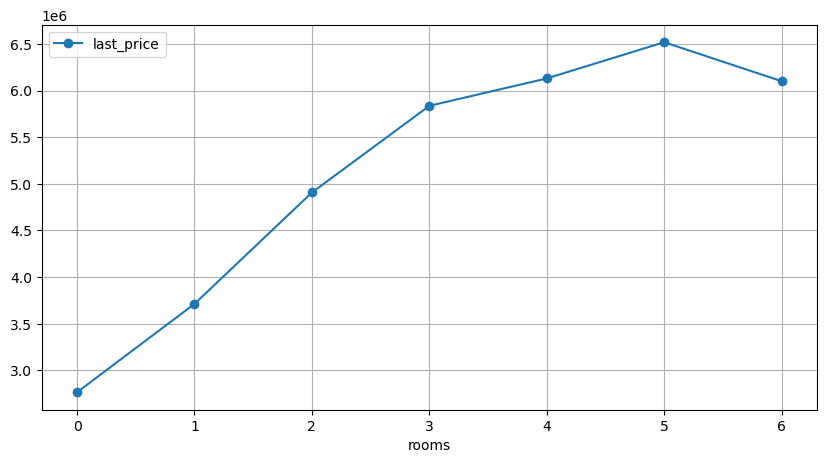

In [597]:
df.pivot_table(index='rooms', values='last_price').reset_index().plot(x='rooms', y='last_price',grid=True,figsize=(10,5), style='o-')

Чем больше комнат, тем больше цена. Скорее всего, чем больше комнат, тем и больше площадь, а выше мы выяснили что общая площадь имеет сильное влияние на цену


###### Типа этажа 

<AxesSubplot:xlabel='type_floor'>

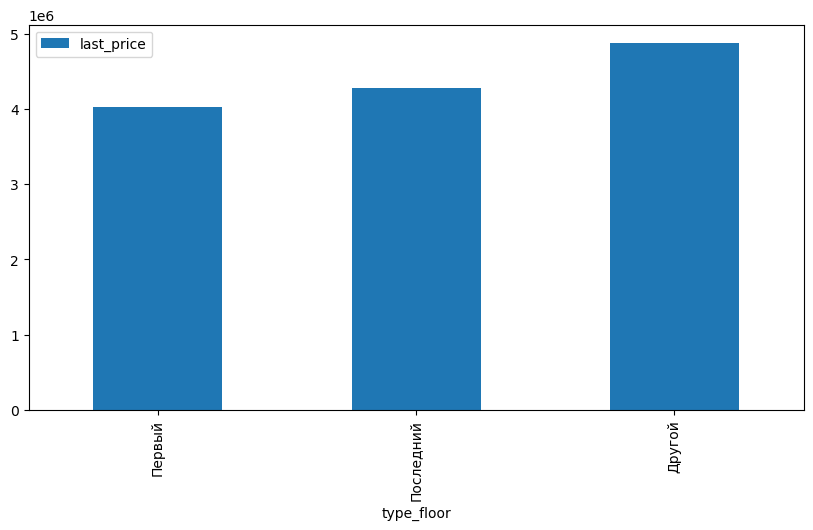

In [598]:
df.pivot_table(index='type_floor', values='last_price').sort_values('last_price').plot(kind='bar',figsize=(10,5))

###### Дня размещения

<AxesSubplot:xlabel='day'>

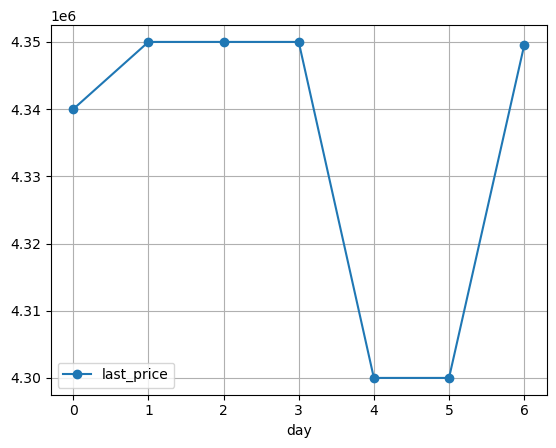

In [599]:
df.pivot_table(index='day', values='last_price', aggfunc='median').reset_index().plot(style='o-',
    x='day',y='last_price', grid=True)


По результатам видно, что самая большая разница в значениях на графике - 50 тысяч. Можно сказать, что не стоит задумываться, в какйо день выкладывать объявление, сильно на цене это не скажется

###### Месяца на цену

<AxesSubplot:xlabel='month'>

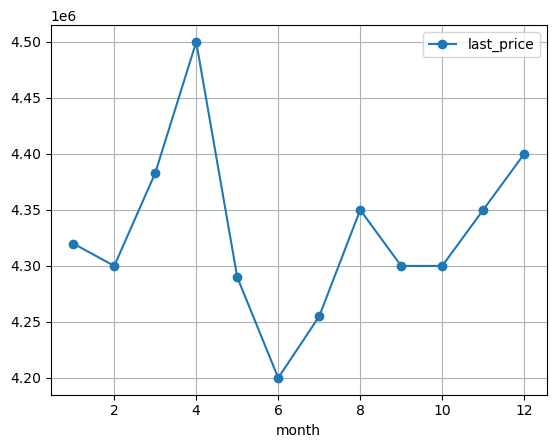

In [600]:
df.pivot_table(index='month', values='last_price', aggfunc='median').reset_index().plot(style='o-',
    x='month',y='last_price', grid=True)


График не стабильный, есть как взлеты так и падения: с января по апрель цены растут -> падают до июня -> до декабря снова растут 

###### Года 

<AxesSubplot:xlabel='year'>

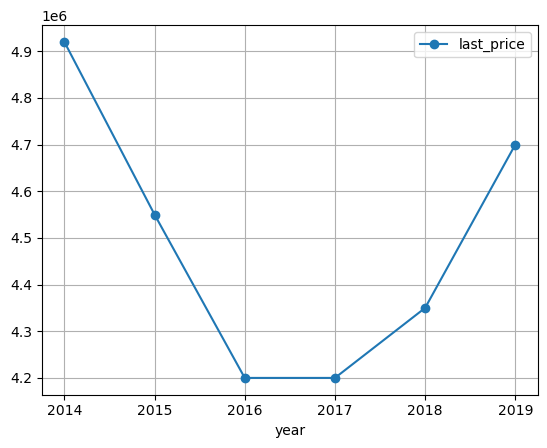

In [601]:
df.pivot_table(index='year', values='last_price', aggfunc='median').reset_index().plot(style='o-',
    x='year',y='last_price', grid=True)


По графику можно предположить, что в 2014 году произошел кризис на рынке, и только с 2017 года рынок начал выходить из него

**Вывод:В ходе исследования выяснили, что на цену больше всего влияет общая площадь квартиры и жилая площадь. Любой этаж кроме первого и последнего так же увеличит стоимость**

##### 10 населенных пунктов с наибольшим числом объявлений

Составим Топ 10 населённых пунктов с наибольшим числом объявлений<br>
Посчитаем среднюю цену квадратного метра в этих населённых пунктах<br>
Выделим населённые пункты с самой высокой и низкой стоимостью жилья<br>

In [602]:
df_10 = df['locality_name'].value_counts().reset_index().head(10)
df_10.columns = ['locality_name', 'count']
t = list(df_10['locality_name'])
d = []
for i in t:
    d.append(df[df['locality_name']== i]['price_1_kvm'].median())
    
df_10['median'] = d
print(df_10)

result = df_10.query('median == median.min() or median == median.max()').reset_index(drop=True)
print()
print(result.loc[0,'locality_name'],'имеет самую высокую стоимость за квадратный метр, равную:',result.loc[0,'median'])
print(result.loc[1,'locality_name'],'имеет самую низкую стоимость за квадратный метр, равную:',result.loc[1,'median'])

     locality_name  count         median
0  Санкт-Петербург  12478  101851.851852
1           Мурино    506   85619.698970
2          Кудрово    404   95985.775249
3           Шушары    402   76747.967480
4       Всеволожск    355   65686.274510
5          Колпино    317   74725.274725
6           Пушкин    301   98039.215686
7          Гатчина    292   67671.510409
8        Парголово    282   92271.978022
9           Выборг    207   58158.319871

Санкт-Петербург имеет самую высокую стоимость за квадратный метр, равную: 101851.85185185185
Выборг имеет самую низкую стоимость за квадратный метр, равную: 58158.31987075929


#### Влияние удаленности недвижимости от центра на ее цену

In [603]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1_kvm,day,month,year,type_floor,KM
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,0,0,81.0,82920.792079,1,12,2018,Первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,...,90,2,574,558.0,92785.714286,3,8,2015,Другой,14.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0,0,0,55.0,95065.789474,0,9,2018,Другой,NaN
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,0,0,0,189.0,87454.764777,2,5,2018,Другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,0,0,289.0,88524.590164,6,2,2017,Другой,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,0,1,806,519.0,129903.978052,3,10,2016,Другой,4.0
23692,2,1350000,30.00,2017-07-07,1,2.60,5,17.50,4,False,...,0,0,0,413.0,45000.000000,4,7,2017,Другой,NaN
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.00,8,False,...,352,1,675,239.0,73717.948718,4,8,2016,Другой,34.0
23695,14,3100000,59.00,2018-01-15,3,2.50,5,38.00,4,False,...,0,0,0,45.0,52542.372881,0,1,2018,Другой,NaN


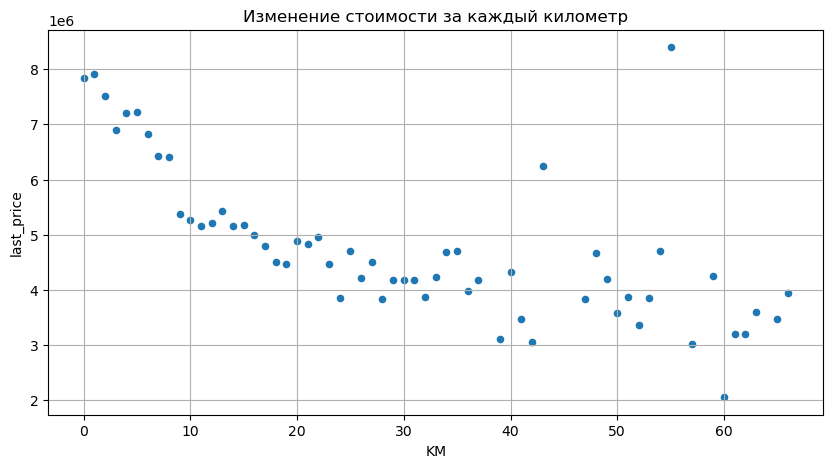

In [610]:

df.pivot_table(index='KM', values=['last_price'], aggfunc='mean').reset_index().plot(
                                                                                        kind='scatter',
                                                                                        x='KM', 
                                                                                        y='last_price',
                                                                                        grid=True,
                                                                                        figsize=(10,5),
                                                                                        title = 'Изменение стоимости за каждый километр')
plt.show()



In [612]:
df['KM'].corr(df['last_price'])

-0.34343384240834157

Вывод: Чем дальше квартира находится от центра, тем дешевле она будет. Имеется выраженный перепад между значениям на 8 и 9 километрах

### Общий вывод

В датасете мы столкнулись с большим количеством пропусков, которые могут повлиять как на анализ в целом, так и на анализ конкретных групп. Часть пропусков заполнялись медианным значениям по группам, как пропуски в `ceiling_height`, так и обычными вычислениям, как в `living_area` и `kitchen_area`.

После этапа предобработки, для каждого объявления была найдена цена за квадратный метр; день, месяц и год публикации;расстояние до центра в километрах, а также присвоена категория в завимиости от этажа квартиры. Далее были построенны гистограммы для изучения того, как распределены объявления в зависимости от параметра :
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Изучили скорость продажи квартир. В среднем квартиры продаются за 97 дней. Нормальным периодом продаж можно считаь 44 - 233 дня.

Выяснили, что такие параметры как: общая площадь, жилая площадь,любой этаж, кроме первого и последнего и близость к центру больше остальных влияют на конечную стоимость. 

Нашли 10 населенных пунктов с самым болшим количесвтом объявлений и из них нашли  населенный пункт с самой большой ценой за квадратный метр, и насленный пункт с самой маленькой ценой за квадратный метр.

Нашли закономерность: за каждый километр от центра квартира теряет в цене.

По итогам мы знаем, что на конечную стоимость квартиры напрямую влияет ее общая и жилая площади, этаж, а также удаленность от центра города. В ходе исследования выяснилось,что в 2014 был кризис на рынке недвижимости, с 2017 года рынок понемногу растет.